# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

Skriv her eller på papir

Se vedlagt PDF

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
n = 200
x = np.linspace(-L, L, n+1)
y = x.copy()
xv, yv = np.meshgrid(x, y)

$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [2]:
V = 1. / (np.sqrt(xv**2 + yv**2))
V = np.clip(V, 0, 10)

/var/folders/wy/n9xc5k0n7d1d1tk7_xq212hh0000gp/T/ipykernel_14334/2255179691.py:1: RuntimeWarning: divide by zero encountered in true_divide
  V = 1. / (np.sqrt(xv**2 + yv**2))


$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

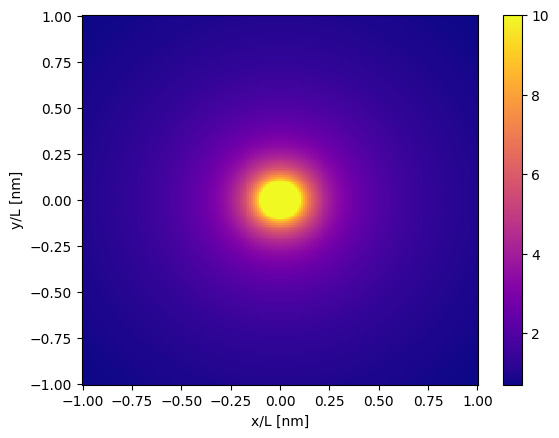

In [3]:
c = plt.pcolormesh(xv, yv, V, cmap='plasma')
plt.colorbar(c)
plt.xlabel('x/L [nm]')
plt.ylabel('y/L [nm]')
plt.show()

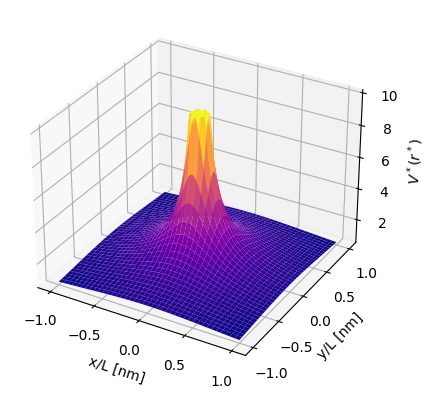

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, V, cmap='plasma')
ax.set(
    xlabel='x/L [nm]',
    ylabel='y/L [nm]',
    zlabel=r'$V^*(r^*)$'
)
plt.show()

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

Skriv her eller på papir

Se vedlagt PDF

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [5]:
def E(V):
    Ex = ( V[1:-1,2:] - V[1:-1,:-2] ) / (x[2:] - x[:-2])
    Ey = ( V[2:,1:-1] - V[:-2,1:-1] ) / (y[2:] - y[:-2])
    return -Ex, -Ey

$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

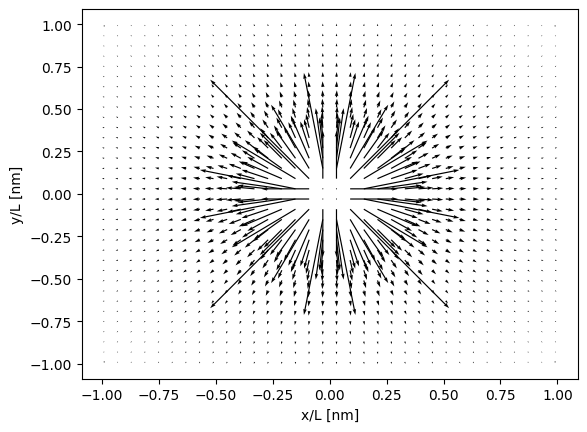

In [6]:
Ex, Ey = E(V)
nn = 6  # plots only every 6 points
plt.quiver(x[1:-1:nn], y[1:-1:nn], Ex[::nn,::nn], Ey[::nn,::nn])
plt.xlabel('x/L [nm]')
plt.ylabel('y/L [nm]')
plt.show()